<a href="https://colab.research.google.com/github/anu-shree-anil/Wine-quality-prediction/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loding the Dataset


In [ ]:
df_red=pd.read_csv("/content/drive/MyDrive/winequality-red.csv",sep=",")
df_white=pd.read_csv("/content/drive/MyDrive/winequality-white.csv",sep=";")
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#statistical-info
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#datatype info
df_red.info()
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [ ]:
#check for null values
print(df_red.isnull().sum())
print(df_white.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


# LINEAR REGRESSION MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
#splitting red wine dataset into train,test
X_red = df_red.drop(columns = ['quality']).copy()
y_red = df_red['quality']
s=StandardScaler()
X_red=s.fit_transform(X_red)
# split the data in training and test dataset
X_train_red, X_test_red, y_train_red,y_test_red = train_test_split(X_red,y_red, train_size=0.6)

#splitting white wine dataset into train,test
X_white = df_white.drop(columns = ['quality']).copy()
s=StandardScaler()
X_white=s.fit_transform(X_white)
y_white = df_white['quality']

# split the data in training and test dataset
X_train_white, X_test_white, y_train_white,  y_test_white = train_test_split(X_white,y_white, train_size=0.6)





In [ ]:
X_train_red

array([[ 0.73560737,  1.35293003, -0.77526673, ..., -0.07200549,
        -0.10710191, -0.02157362],
       [-0.06873526,  0.62668808, -0.0050098 , ..., -1.17348276,
        -0.22512806, -1.24184785],
       [-1.1603431 , -1.27271396,  1.0733499 , ...,  0.83509345,
         0.71908117, -0.11544087],
       ...,
       [ 0.21852997, -0.60233677,  0.91929852, ...,  0.12237286,
         0.66006809,  1.48030237],
       [-0.06873526,  0.23563472, -0.05636026, ..., -0.07200549,
        -1.34637652, -0.30317536],
       [-0.47090657,  0.57082331, -0.0050098 , ..., -0.33117661,
        -0.46118037, -0.58477711]])

In [ ]:
X_train_white

array([[-0.77601514,  0.71200485, -0.36519658, ..., -0.58460464,
         0.87765711,  1.26160586],
       [-0.53898711, -0.28021359,  3.35358273, ...,  0.14394366,
        -0.61207884, -1.06808001],
       [ 0.527639  , -0.57787912,  1.28759423, ..., -1.31315295,
        -1.48839409,  0.394746  ],
       ...,
       [-0.06493106, -0.18099175,  1.20495468, ...,  0.14394366,
        -0.34918426, -0.90554379],
       [ 0.527639  ,  1.30733592, -0.77839428, ...,  0.077712  ,
        -0.69971036, -0.49920323],
       [-0.4204731 ,  1.60500145,  1.12231514, ..., -0.38590965,
        -1.48839409,  2.02010823]])

In [ ]:
#Linear regression model for red wine quality

reg_red = LinearRegression()
reg_red.fit(X_train_red, y_train_red)
train_pred = reg_red.predict(X_train_red)
test_pred = reg_red.predict(X_test_red) 
print(test_pred)

print('Training MSE:', metrics.mean_squared_error(y_train_red, train_pred))
print('Test MSE:', metrics.mean_squared_error(y_test_red, test_pred))

print("Coef:\n",reg_red.coef_)

[5.38955197 5.28591557 5.35264268 6.53141973 5.82626421 6.1741163
 6.13481735 5.23615715 5.57841508 5.6112102  6.15305305 6.07504026
 5.55493819 6.25192792 4.93309989 6.52208766 5.09206065 5.52285295
 5.64347259 4.9730013  5.39881319 4.92275983 6.29311803 6.60699834
 5.61437064 6.47233748 5.09931821 6.58834484 5.30638941 6.88221188
 6.67485447 6.6381555  5.33799667 6.17520237 5.1776656  4.92201465
 5.39447434 6.79463021 5.41363894 6.17520237 5.10889376 5.18274295
 5.39928504 4.64339302 5.65409416 4.86165086 6.14531696 5.25659465
 5.56855885 5.42070545 5.60298168 5.57141227 5.7631522  5.88943898
 6.65779788 6.08936925 5.20838414 6.10114597 6.25407047 5.86516823
 5.82198157 5.2548957  5.39438609 5.55232697 6.55227837 6.19116326
 5.06414079 5.48250015 5.99936723 5.15348174 5.26813182 5.3645454
 5.46117742 5.3609755  5.00057502 5.66548272 5.32274494 5.90161482
 5.68000128 5.10971798 6.19149008 5.74674801 5.71237018 6.27553752
 5.38598291 5.55232697 5.32237374 5.31590782 4.95918796 5.551437

In [ ]:
#Linear regression model for white wine quality

reg_white = LinearRegression()
reg_white.fit(X_train_white, y_train_white)

train_pred = reg_white.predict(X_train_white)
test_pred = reg_white.predict(X_test_white) 
print(test_pred)

print('Training MSE:', metrics.mean_squared_error(y_train_white, train_pred))
print('Test MSE:', metrics.mean_squared_error(y_test_white, test_pred))

print("Coef:\n",reg_white.coef_)


[6.47050423 5.55365937 5.64928917 ... 6.14237737 5.55793142 5.67883891]
Training MSE: 0.5527146104016919
Test MSE: 0.5846955161947223
Coef:
 [ 0.09496798 -0.18396758  0.00426833  0.48741352  0.0034576   0.06495748
  0.00448335 -0.60633007  0.14536162  0.08625483  0.15573999]


# Stochatic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_red = SGDRegressor()
sgd_red.fit(X_train_red, y_train_red)
train_pred = sgd_red.predict(X_train_red)
test_pred = sgd_red.predict(X_test_red) 

print('Training MSE:', metrics.mean_squared_error(y_train_red, train_pred))
print('Test MSE:', metrics.mean_squared_error(y_test_red, test_pred))

print("Coef:\n",sgd_red.coef_)

Training MSE: 0.40894280911361963
Test MSE: 0.43177498808494175
Coef:
 [ 0.07932252 -0.20382496 -0.05043244  0.05439896 -0.0777705   0.0504669
 -0.10711036 -0.08053112 -0.06090364  0.13904089  0.27718741]


In [ ]:
sgd_white = SGDRegressor()
sgd_white.fit(X_train_white, y_train_white)
train_pred = sgd_white.predict(X_train_white)
test_pred = sgd_white.predict(X_test_white) 


print('Training MSE:', metrics.mean_squared_error(y_train_white, train_pred))
print('Test MSE:', metrics.mean_squared_error(y_test_white, test_pred))

print("Coef:\n",sgd_white.coef_)

Training MSE: 0.5563488135495229
Test MSE: 0.5802255140163389
Coef:
 [ 0.01579287 -0.19062085 -0.00892386  0.27575086  0.00187135  0.0587714
 -0.01590793 -0.25941305  0.08426515  0.06276259  0.31082141]


# Classification Algorithms

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.model_selection import train_test_split,cross_val_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


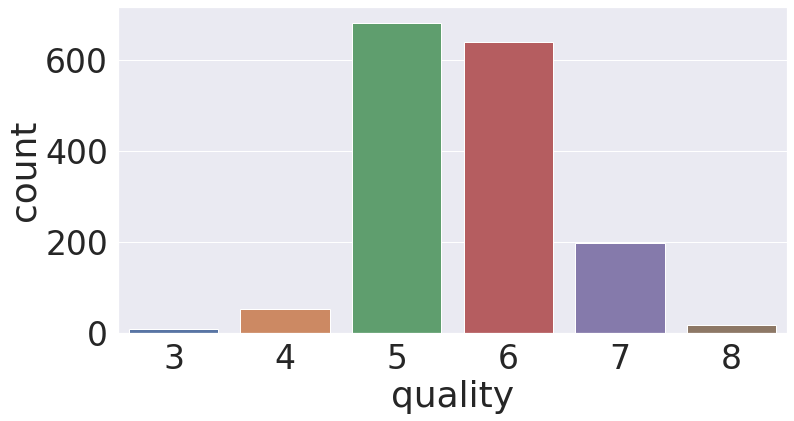

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


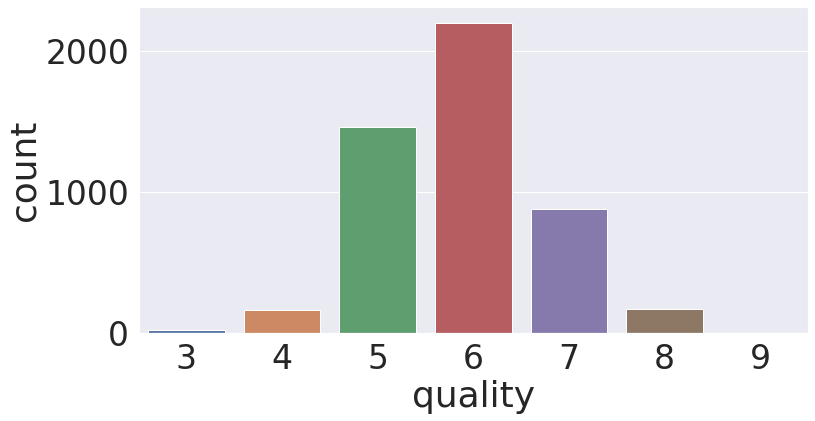

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df_red['quality'])
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(df_white['quality'])
plt.show()

In [ ]:
bins=(2,6.5,9)
classes=['bad','good']
df_red['quality']=pd.cut(df_red['quality'],bins=bins,labels=classes)

In [ ]:
bins=(2,6.5,9)
classes=['bad','good']
df_white['quality']=pd.cut(df_white['quality'],bins=bins,labels=classes)

In [ ]:
label_quality=LabelEncoder()

In [ ]:
df_red['quality']=label_quality.fit_transform(df_red['quality'])

In [ ]:
label_quality=LabelEncoder()

In [ ]:
df_white['quality']=df_white.apply(lambda i: label_quality.fit_transform(df_white['quality'].astype(str)))

In [ ]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
df_red['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
df_white['quality'].value_counts()

0    3838
1    1060
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


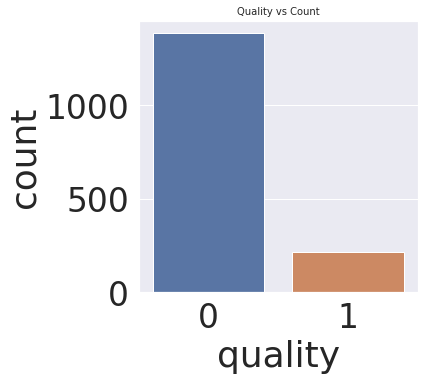

In [ ]:
plt.figure(figsize=(5,5))
sns.set(font_scale=3)
plt.title("Quality vs Count",fontsize=10)
sns.countplot(df_red['quality'])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


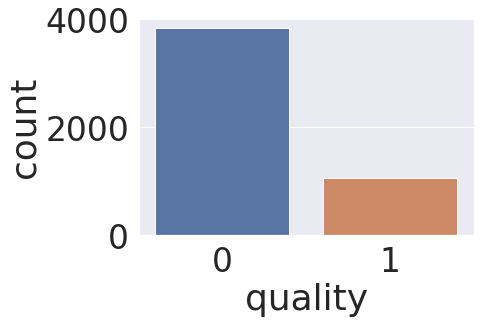

In [ ]:
sns.countplot(df_white['quality'])

In [ ]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [ ]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [ ]:
#splitting red wine dataset into train,test
X_red = df_red.drop(columns = ['quality']).copy()
y_red = df_red['quality']

# split the data in training and test dataset
X_train_red, X_rem, y_train_red,y_rem = train_test_split(X_red,y_red, train_size=0.6)

X_valid_red, X_test_red, y_valid_red,y_test_red = train_test_split(X_rem,y_rem, test_size=0.5)

#splitting white wine dataset into train,test
X_white = df_white.drop(columns = ['quality']).copy()
y_white = df_white['quality']

# split the data in training and test dataset
X_train_white, X_rem, y_train_white,  y_rem = train_test_split(X_white,y_white, train_size=0.6)

X_valid_white, X_test_white, y_valid_white,  y_test_white = train_test_split(X_rem,y_rem, test_size=0.5)

#normalization
s=StandardScaler()
X_train_red=s.fit_transform(X_train_red)
X_valid_red=s.fit_transform(X_valid_red)
X_test_red=s.fit_transform(X_test_red)

X_train_white=s.fit_transform(X_train_white)
X_valid_white=s.fit_transform(X_valid_white)
X_test_white=s.fit_transform(X_test_white)


## Logistic Regression

In [ ]:
#red wine
param = [    
    {'max_iter' : [1000,2000,3000],
    'tol' : [0.1, 0.01, 0.001, 0.0001, 0.00001],
    }
]
clf = GridSearchCV(LogisticRegression(), param_grid = param, n_jobs=-1)

best_clf = clf.fit(X_train_red,y_train_red)

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
LR_red=LogisticRegression(max_iter=3000,tol=0.1).fit(X_train_red,y_train_red)

In [ ]:
#white wine
param = [    
    {'max_iter' : [1000,2000,3000],
    'tol' : [0.1, 0.01, 0.001, 0.0001, 0.00001],
    }
]
clf = GridSearchCV(LogisticRegression(), param_grid = param, n_jobs=-1)

best_clf = clf.fit(X_train_white,y_train_white)

In [ ]:
best_clf.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [ ]:
LR_white=LogisticRegression(max_iter=1000,tol=0.1).fit(X_train_white,y_train_white)

In [ ]:
pred_red=LR_red.predict(X_test_red)
pred_white=LR_white.predict(X_test_white)
cm_red=confusion_matrix(y_test_red,pred_red)
cm_white=confusion_matrix(y_test_white,pred_white)
print("Confusion matrix for red wine \n",cm_red)
print("Confusion matrix for white wine \n",cm_white)


#class-wise accuracy,precision,recall for red wine
print("\n\nRED WINE")
print("Class-wise precision \n",precision_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_red.astype('float') / cm_red.sum(axis=1)).diagonal())

#class-wise accuracy,precision,recall for white wine
print("\n\nWHITE WINE")
print("Class-wise precision \n",precision_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_white.astype('float') / cm_white.sum(axis=1)).diagonal())

pred_red_train=LR_red.predict(X_train_red)
acc_red_train=accuracy_score(y_train_red,pred_red_train)
print("\n\nTraining Accuracy for red wine: ",acc_red_train*100)

acc_red=accuracy_score(y_test_red,pred_red)
print("Testing Accuracy for red wine: ",acc_red*100)

pred_white_train=LR_white.predict(X_train_white)
acc_white_train=accuracy_score(y_train_white,pred_white_train)
print("Training Accuracy for white wine: ",acc_white_train*100)

acc_white=accuracy_score(y_test_white,pred_white)
print("Testing Accuracy for white wine: ",acc_white*100)

Confusion matrix for red wine 
 [[275   1]
 [ 44   0]]
Confusion matrix for white wine 
 [[779   0]
 [201   0]]


RED WINE
Class-wise precision 
 [0.86206897 0.        ]
Class-wise recall 
  [0.99637681 0.        ]
Class-wise Accuracy 
 [0.99637681 0.        ]


WHITE WINE
Class-wise precision 
 [0.79489796 1.        ]
Class-wise recall 
  [1. 0.]
Class-wise Accuracy 
 [1. 0.]


Training Accuracy for red wine:  85.61001042752866
Testing Accuracy for red wine:  85.9375
Training Accuracy for white wine:  77.97821647379169
Testing Accuracy for white wine:  79.48979591836735


In [ ]:
#For red wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_red):
    X_train , X_test = X_red.iloc[train_index],X_red.iloc[test_index]
    y_train , y_test = y_red[train_index] , y_red[test_index]
    
    red =  LogisticRegression(tol=0.1, max_iter=1000).fit(X_train, y_train.ravel())
    y_pred=red.predict(X_test)
    acc_score.append(red.score(X_test, y_test)*100)
  
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [91.875, 83.75, 89.6875, 81.875, 92.78996865203762]
Avg accuracy : 87.99549373040752


In [ ]:
#For white wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_white):
    X_train , X_test = X_white.iloc[train_index],X_white.iloc[test_index]
    y_train , y_test = y_white[train_index] , y_white[test_index]
     
    white = LogisticRegression(tol=0.1, max_iter=1000).fit(X_train, y_train.ravel())
    y_pred=white.predict(X_test)
    acc_score.append(white.score(X_test, y_test)*100)
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [79.18367346938776, 80.20408163265306, 83.26530612244898, 78.14096016343207, 77.732379979571]
Avg accuracy : 79.70528027349857




```
# This is formatted as code
```

## Perceptron Model

In [ ]:
from sklearn.utils import shuffle
import random
import math

### Perceptron with threshold activation function

In [ ]:
def perceptron(X,y,learning_rate):
  
  X_arr = X
  Y_arr = y

  X_arr=np.insert(X_arr,0,1,axis=1)
  X_arr=np.array(X_arr)
  Y_arr=np.array(y)

  X_arr, Y_arr = shuffle(X_arr, Y_arr)
  l=learning_rate
 
  w=[]
  for i in range(X_arr.shape[1]):
    w.append(random.uniform(-0.3,0.3))

  w= np.array(w)  
  visited_index=[]
  index = random.randint(0, len(X_arr)-1)
  epoch=1
  converged=True
  err_in=0
  err=0
  while converged:
    d=0
    X_arr, Y_arr = shuffle(X_arr, Y_arr)
    h_x=np.dot(X_arr[index],w)

    if(h_x>0):
        d=1
    else:
        d=0

    err_in= err_in+(1/2)*((d-Y_arr[index])**2)
    for i in range(len(w)):
         w[i]=w[i]+(l*(Y_arr[index]-d)*X_arr[index][i])
    
    index = random.randint(0, len(X_arr)-1)
    visited_index.append(index)
    
    if (len(set(visited_index))==len(X_arr)):
      pred=predict(X,y,w)
      performance=accuracy_score(y,pred)  
      h_x=np.dot(X_arr[index],w)
     
      if(h_x>0):
            d=1
      else:
            d=0 
      err= err+(1/2)*((d-Y_arr[index])**2)
     
      if(abs(err-err_in)<0.001 or performance*100>=75):
        print("Successfully converged:")
        print("Accuracy :",performance*100)
        converged=False
      else:
        visited_index=[]  
    epoch=epoch+1
  return w

In [ ]:
def predict(X,y,w):

  X = X
  Y = y

  X=np.insert(X,0,1,axis=1)
  X_arr=np.array(X)
  Y_arr=np.array(y)
  Y_predict=np.zeros(len(Y_arr))
  
  h=np.dot(X_arr,w)
  d=[]
  for k in range(len(h)):
         if(h[k]>0):
            d.append(1)

         else:
            d.append(0)   
  d=np.array(d)
  for i in range(len(d)):
     if(d[i]==0):
       Y_predict[i]=0

     else:
       Y_predict[i]=1  
  test_acc=accuracy_score(Y_arr,Y_predict)  
  
  return Y_predict

For Red wine

In [ ]:
#Training the Model for red wine
w_red=perceptron(X_train_red,y_train_red,0.3)
w_red_wine=w_red

Successfully converged:
Accuracy : 85.29718456725756


In [ ]:
w_red=perceptron(X_valid_red,y_valid_red,0.2)

Successfully converged:
Accuracy : 90.3125


In [ ]:
#Hyperparameter tuning
w_red=perceptron(X_valid_red,y_valid_red,0.3)

Successfully converged:
Accuracy : 83.75


In [ ]:
w_red=perceptron(X_valid_red,y_valid_red,0.4)

Successfully converged:
Accuracy : 85.9375


In [ ]:
w_red=perceptron(X_valid_red,y_valid_red,0.5)

Successfully converged:
Accuracy : 86.5625


In [ ]:
w_red=perceptron(X_valid_red,y_valid_red,0.6)

Successfully converged:
Accuracy : 87.1875


In [ ]:
pred=predict(X_test_red,y_test_red,w_red)
print("Test Accuracy: ",accuracy_score(y_test_red,pred)*100)

Test Accuracy:  88.125


For white wine

In [ ]:
#Training the Model for white wine
w_white=perceptron(X_train_white,y_train_white,0.4)
w_white_wine=w_white

Successfully converged:
Accuracy : 75.90197413206263


In [ ]:
w_white=perceptron(X_valid_white,y_valid_white,0.4) 

Successfully converged:
Accuracy : 79.48979591836735


In [ ]:
#Hyperparameter tuning
w_white=perceptron(X_valid_white,y_valid_white,0.5) 

Successfully converged:
Accuracy : 76.32653061224491


In [ ]:
w_white=perceptron(X_valid_white,y_valid_white,0.6) 

Successfully converged:
Accuracy : 77.14285714285715


In [ ]:
w_white=perceptron(X_valid_white,y_valid_white,0.7) 

Successfully converged:
Accuracy : 77.65306122448979


In [ ]:
pred=predict(X_test_white,y_test_white,w_white)
print("Test Accuracy: ",accuracy_score(y_test_white,pred)*100)

Test Accuracy:  77.04081632653062


In [ ]:
#For red wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_red):
    X_train , X_test = X_red.iloc[train_index],X_red.iloc[test_index]
    y_train , y_test = y_red[train_index] , y_red[test_index]
    red = perceptron(np.array(X_train),y_train,0.3)
    y_pred=predict(np.array(X_test),y_test,red)
    acc_score.append(accuracy_score(y_test,y_pred)*100)
   
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Successfully converged:
Accuracy : 84.28459734167319
Successfully converged:
Accuracy : 87.17748240813135
Successfully converged:
Accuracy : 86.55199374511336
Successfully converged:
Accuracy : 88.42845973416732
Successfully converged:
Accuracy : 84.921875
accuracy of each fold - [92.5, 83.4375, 86.25, 78.4375, 90.9090909090909]
Avg accuracy : 86.30681818181817


In [ ]:
pred_red=predict(X_test_red,y_test_red,w_red)
pred_white=predict(X_test_white,y_test_white,w_white)
cm_red=confusion_matrix(y_test_red,pred_red)
cm_white=confusion_matrix(y_test_white,pred_white)
print("Confusion matrix for red wine \n",cm_red)

acc_red=accuracy_score(y_test_red,pred_red)

#class-wise accuracy,precision,recall for red wine
print("\n\nRED WINE")
print("Class-wise precision \n",precision_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_red.astype('float') / cm_red.sum(axis=1)).diagonal())


Confusion matrix for red wine 
 [[267  19]
 [ 19  15]]


RED WINE
Class-wise precision 
 [0.93356643 0.44117647]
Class-wise recall 
  [0.93356643 0.44117647]
Class-wise Accuracy 
 [0.93356643 0.44117647]


In [ ]:
#For white wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_white):
    X_train , X_test = X_white.iloc[train_index],X_white.iloc[test_index]
    y_train , y_test = y_white[train_index] , y_white[test_index]
    white = perceptron(np.array(X_train),y_train,0.6)
    y_pred=predict(np.array(X_test),y_test,red)
    acc_score.append(accuracy_score(y_test,y_pred)*100)
   
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Successfully converged:
Accuracy : 78.40735068912711
Successfully converged:
Accuracy : 78.05002552322614
Successfully converged:
Accuracy : 77.51403777437467
Successfully converged:
Accuracy : 78.66802755805053
Successfully converged:
Accuracy : 76.6777239091605
accuracy of each fold - [77.14285714285715, 78.77551020408163, 80.91836734693878, 72.11440245148111, 82.63534218590398]
Avg accuracy : 78.31729586625254


In [ ]:
#class-wise accuracy,precision,recall for white wine
print("Confusion matrix for white wine \n",cm_white)
print("\n\nWHITE WINE")
print("Class-wise precision \n",precision_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_white.astype('float') / cm_white.sum(axis=1)).diagonal())


Confusion matrix for white wine 
 [[742  35]
 [190  13]]


WHITE WINE
Class-wise precision 
 [0.79613734 0.27083333]
Class-wise recall 
  [0.95495495 0.06403941]
Class-wise Accuracy 
 [0.95495495 0.06403941]


### Perceptron with sigmoid activation function

In [ ]:
def sigmoid_neuron(X,y,learning_rate):
  
  X_arr = X
  Y_arr = y

  X_arr=np.insert(X_arr,0,1,axis=1)
  X_arr=np.array(X_arr)
  Y_arr=np.array(y)

  X_arr, Y_arr = shuffle(X_arr, Y_arr)
  l=learning_rate
 
  w=[]
  for i in range(X_arr.shape[1]):
    w.append(random.uniform(-0.3,0.3))

  w= np.array(w)  
  visited_index=[]
  index = random.randint(0, len(X_arr)-1)
  epoch=1
  converged=True
  err_in=0
  err=0
  while converged:
    X_arr, Y_arr = shuffle(X_arr, Y_arr)
    h_x=1/(1+np.exp(-np.dot(X_arr[index],w)))
    err_in= err_in+(1/2)*((h_x-Y_arr[index])**2)
    for i in range(len(w)):
         w[i]=w[i]+(l*(Y_arr[index]-h_x)*X_arr[index][i]*h_x*(1-h_x))
    
    index = random.randint(0, len(X_arr)-1)
    visited_index.append(index)
    
    if (len(set(visited_index))==len(X_arr)):
      pred=predict_sigmoid(X,y,w)
      performance=accuracy_score(y,pred)  
      h_x=1/(1+np.exp(-(np.dot(X_arr[index],w))))   
      err= err+(1/2)*((h_x-Y_arr[index])**2)
     
      if(abs(err-err_in)<0.001 or performance*100>=75):
        print("Successfully converged:")
        print("Accuracy :",performance*100)
        converged=False
      else:
        visited_index=[]  
    epoch=epoch+1
  return w

In [ ]:
def predict_sigmoid(X,y,w):

  X = X
  Y = y

  X=np.insert(X,0,1,axis=1)
  X_arr=np.array(X)
  Y_arr=np.array(y)
  Y_predict=np.zeros(len(Y_arr))
  
  h= 1/(1+np.exp(-(np.dot(X_arr,w))))
    
  
  for i in range(len(h)):
     if(h[i]<0.5):
       Y_predict[i]=0

     if(h[i]>=0.5):
       Y_predict[i]=1  
  test_acc=accuracy_score(Y_arr,Y_predict)  
  
  return Y_predict

For Red wine

In [ ]:
#Training the Model for red wine
w_red=sigmoid_neuron(X_train_red,y_train_red,0.6)
w_red_wine=w_red

Successfully converged:
Accuracy : 86.75703858185611


In [ ]:
#Hyperparameter tuning
w_red=sigmoid_neuron(X_valid_red,y_valid_red,0.3)

Successfully converged:
Accuracy : 90.3125


In [ ]:
w_red=sigmoid_neuron(X_valid_red,y_valid_red,0.4)

Successfully converged:
Accuracy : 89.375


In [ ]:
w_red=sigmoid_neuron(X_valid_red,y_valid_red,0.6) #BEST

Successfully converged:
Accuracy : 88.125


In [ ]:
w_red=sigmoid_neuron(X_valid_red,y_valid_red,0.5)

Successfully converged:
Accuracy : 89.6875


In [ ]:
pred=predict_sigmoid(X_test_red,y_test_red,w_red)
print("Test Accuracy: ",accuracy_score(y_test_red,pred)*100)

Test Accuracy:  87.5


For white wine

In [ ]:
#Training the Model for white wine
w_white=sigmoid_neuron(X_train_white,y_train_white,0.5)
w_white_wine=w_white

Successfully converged:
Accuracy : 78.48876786929885


In [ ]:
w_white=sigmoid_neuron(X_valid_white,y_valid_white,0.4)

Successfully converged:
Accuracy : 82.0408163265306


In [ ]:
#Hyperparameter tuning
w_white=sigmoid_neuron(X_valid_white,y_valid_white,0.5) #BEST

Successfully converged:
Accuracy : 81.53061224489797


In [ ]:
w_white=sigmoid_neuron(X_valid_white,y_valid_white,0.6)

Successfully converged:
Accuracy : 81.3265306122449


In [ ]:
w_white=sigmoid_neuron(X_valid_white,y_valid_white,0.7)

Successfully converged:
Accuracy : 81.0204081632653


In [ ]:
pred=predict_sigmoid(X_test_white,y_test_white,w_white)
print("Test Accuracy: ",accuracy_score(y_test_white,pred)*100)

Test Accuracy:  79.48979591836735


In [ ]:
pred_red=predict_sigmoid(X_test_red,y_test_red,w_red)
pred_white=predict_sigmoid(X_test_white,y_test_white,w_white)
cm_red=confusion_matrix(y_test_red,pred_red)
cm_white=confusion_matrix(y_test_white,pred_white)
print("Confusion matrix for red wine \n",cm_red)

acc_red=accuracy_score(y_test_red,pred_red)

#class-wise accuracy,precision,recall for red wine
print("\n\nRED WINE")
print("Class-wise precision \n",precision_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_red.astype('float') / cm_red.sum(axis=1)).diagonal())


Confusion matrix for red wine 
 [[260  26]
 [ 14  20]]


RED WINE
Class-wise precision 
 [0.94890511 0.43478261]
Class-wise recall 
  [0.90909091 0.58823529]
Class-wise Accuracy 
 [0.90909091 0.58823529]


In [ ]:
#For red wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_red):
    X_train , X_test = X_red.iloc[train_index],X_red.iloc[test_index]
    y_train , y_test = y_red[train_index] , y_red[test_index]
    red = sigmoid_neuron(np.array(X_train),y_train,0.5)
    y_pred=predict_sigmoid(np.array(X_test),y_test,red)
    acc_score.append(accuracy_score(y_test,y_pred)*100)
   
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Successfully converged:
Accuracy : 84.91008600469117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Successfully converged:
Accuracy : 87.17748240813135
Successfully converged:
Accuracy : 86.70836591086787
Successfully converged:
Accuracy : 88.42845973416732
Successfully converged:
Accuracy : 84.921875
accuracy of each fold - [92.5, 83.4375, 85.3125, 78.4375, 92.47648902821317]
Avg accuracy : 86.43279780564264


In [ ]:
#class-wise accuracy,precision,recall for white wine
print("Confusion matrix for white wine \n",cm_white)
print("\n\nWHITE WINE")
print("Class-wise precision \n",precision_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_white.astype('float') / cm_white.sum(axis=1)).diagonal())


Confusion matrix for white wine 
 [[684  93]
 [108  95]]


WHITE WINE
Class-wise precision 
 [0.86363636 0.50531915]
Class-wise recall 
  [0.88030888 0.4679803 ]
Class-wise Accuracy 
 [0.88030888 0.4679803 ]


In [ ]:
#For white wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_white):
    X_train , X_test = X_white.iloc[train_index],X_white.iloc[test_index]
    y_train , y_test = y_white[train_index] , y_white[test_index]
    white = sigmoid_neuron(np.array(X_train),y_train,0.6)
    y_pred=predict_sigmoid(np.array(X_test),y_test,red)
    acc_score.append(accuracy_score(y_test,y_pred)*100)
   
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

Successfully converged:
Accuracy : 78.66258295048493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


Successfully converged:
Accuracy : 78.25421133231241
Successfully converged:
Accuracy : 77.71822358346095


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in exp


Successfully converged:
Accuracy : 79.86731309007399
Successfully converged:
Accuracy : 77.2901250318959
accuracy of each fold - [77.14285714285715, 78.77551020408163, 80.91836734693878, 72.31869254341164, 82.63534218590398]
Avg accuracy : 78.35815388463865


## Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
#red wine
param_grid = [    
    {
    'alpha': [0.1,0.01],
     
    'max_iter' : [1000,2000,3000],
    }
]

clf = GridSearchCV(MLPClassifier(),param_grid, n_jobs=-1)

best_clf = clf.fit(X_train_red, y_train_red)

In [ ]:
best_clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#For red wine

MLP_red = MLPClassifier(alpha=0.1,max_iter=3000).fit(X_train_red, y_train_red.ravel())
print("Training Accuracy: ",MLP_red.score(X_train_red, y_train_red)*100)
print("Test Accuracy: ",MLP_red.score(X_test_red, y_test_red)*100)

Training Accuracy:  97.49739311783108
Test Accuracy:  90.3125


In [ ]:
#white wine
param_grid = [    
    {
    'alpha': [0.1,0.01],
     
    'max_iter' : [1000,2000,3000],
    }
]

clf = GridSearchCV(MLPClassifier(),param_grid, n_jobs=-1)

best_clf = clf.fit(X_train_white, y_train_white)

In [ ]:
best_clf.best_estimator_

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#For white wine

MLP_white = MLPClassifier(alpha=0.001,max_iter=1000).fit(X_train_white, y_train_white.ravel())
print("Training Accuracy: ",MLP_white.score(X_train_white, y_train_white)*100)
print("Testing Accuracy: ",MLP_white.score(X_test_white, y_test_white)*100)

Training Accuracy:  93.05650102110279
Testing Accuracy:  83.46938775510205


In [ ]:
pred_red=MLP_red.predict(X_test_red)
pred_white=MLP_white.predict(X_test_white)
cm_red=confusion_matrix(y_test_red,pred_red)
cm_white=confusion_matrix(y_test_white,pred_white)
print("Confusion matrix for red wine \n",cm_red)

acc_red=accuracy_score(y_test_red,pred_red)

#class-wise accuracy,precision,recall for red wine
print("\n\nRED WINE")
print("Class-wise precision \n",precision_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_red,pred_red, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_red.astype('float') / cm_red.sum(axis=1)).diagonal())


Confusion matrix for red wine 
 [[270  16]
 [ 15  19]]


RED WINE
Class-wise precision 
 [0.94736842 0.54285714]
Class-wise recall 
  [0.94405594 0.55882353]
Class-wise Accuracy 
 [0.94405594 0.55882353]


In [ ]:
#For red wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_red):
    X_train_red , X_test_red = X_red.iloc[train_index],X_red.iloc[test_index]
    y_train_red , y_test_red = y_red[train_index] , y_red[test_index]
     
    red = MLPClassifier(alpha=0.1,max_iter=3000).fit(X_train_red, y_train_red.ravel())
    y_pred=red.predict(X_test_red)
    acc_score.append(red.score(X_test_red, y_test_red)*100)
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [93.4375, 82.1875, 89.0625, 80.3125, 91.53605015673982]
Avg accuracy : 87.30721003134796


In [ ]:
#class-wise accuracy,precision,recall for white wine
print("Confusion matrix for white wine \n",cm_white)
print("\n\nWHITE WINE")
print("Class-wise precision \n",precision_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise recall \n ",recall_score(y_test_white,pred_white, average=None, zero_division=1))
print("Class-wise Accuracy \n",(cm_white.astype('float') / cm_white.sum(axis=1)).diagonal())


Confusion matrix for white wine 
 [[706  71]
 [ 91 112]]


WHITE WINE
Class-wise precision 
 [0.88582183 0.61202186]
Class-wise recall 
  [0.90862291 0.55172414]
Class-wise Accuracy 
 [0.90862291 0.55172414]


In [ ]:
#For white wine

k = 5
kf = KFold(n_splits=k, random_state=None,shuffle=False) 
acc_score = []
i=1
for train_index , test_index in kf.split(X_white):
    X_train_white , X_test_white = X_white.iloc[train_index],X_white.iloc[test_index]
    y_train_white , y_test_white = y_white[train_index] , y_white[test_index]
     
    white = MLPClassifier(alpha=0.1,max_iter=1000).fit(X_train_white, y_train_white.ravel())
    y_pred=white.predict(X_test_white)
    acc_score.append(white.score(X_test_white, y_test_white)*100)
    i=i+1 
avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [81.3265306122449, 79.48979591836735, 84.28571428571429, 73.8508682328907, 79.87742594484168]
Avg accuracy : 79.76606699881178
